## CREATE KEYSPACE

In [11]:
CREATE KEYSPACE excelsior
   WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 3};

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [5]:
CREATE KEYSPACE excalibur_n
   WITH replication = {'class': 'NetworkTopologyStrategy', 'DC1' : 1, 'DC2' : 2}
   AND durable_writes = false;

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ConfigurationException
--------
<Error from server: code=2300 [Query invalid because of configuration issue] message="Unrecognized strategy option {DC2} passed to NetworkTopologyStrategy for keyspace excalibur_n">

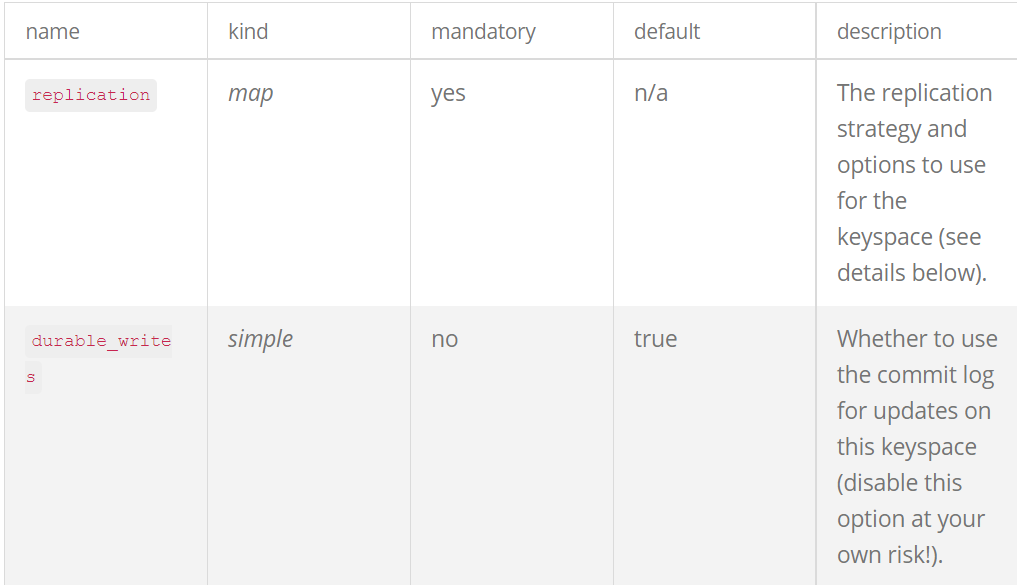

## SimpleStrategy
- A simple strategy that defines a replication factor for data to be spread across the entire cluster. This is generally not a wise choice for production, as it does not respect datacenter layouts and can lead to wildly varying query latency. For production, use NetworkTopologyStrategy.

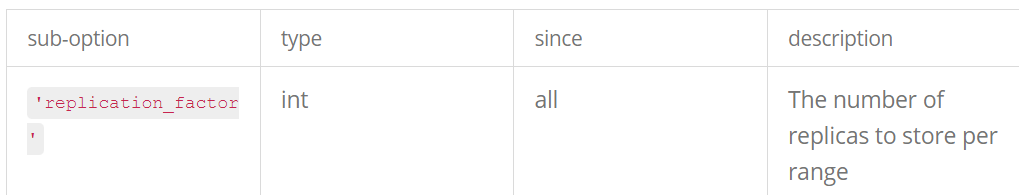

## NetworkTopologyStrategy
- A production-ready replication strategy that sets the replication factor independently for each data-center. The rest of the sub-options are key-value pairs, with a key set to a data-center name and its value set to the associated replication factor. Options:

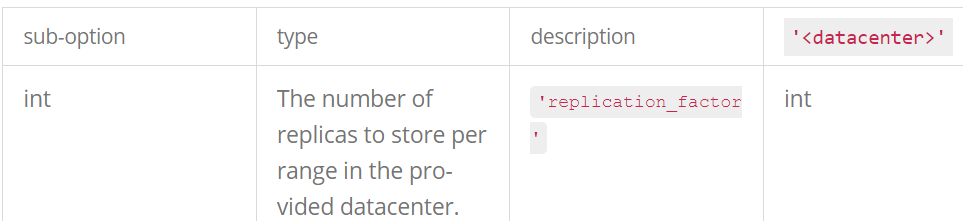

## USE
- The USE statement changes the current keyspace to the specified keyspace.

In [ ]:
USE excelsior;

## ALTER KEYSPACE
- An ALTER KEYSPACE statement modifies the options of a keyspace:

In [9]:
ALTER KEYSPACE excelsior
    WITH replication = {'class': 'SimpleStrategy', 'replication_factor' : 4};

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

## DROP KEYSPACE


In [13]:
//DROP KEYSPACE excelsior;


## CREATE TABLE

In [15]:
USE excelsior;
CREATE TABLE monkey_species (
    species text PRIMARY KEY,
    common_name text,
    population varint,
    average_size int
) WITH comment='Important biological records';

CREATE TABLE timeline (
    userid uuid,
    posted_month int,
    posted_time uuid,
    body text,
    posted_by text,
    PRIMARY KEY (userid, posted_month, posted_time)
) WITH compaction = { 'class' : 'LeveledCompactionStrategy' };

CREATE TABLE loads (
    machine inet,
    cpu int,
    mtime timeuuid,
    load float,
    PRIMARY KEY ((machine, cpu), mtime)
) WITH CLUSTERING ORDER BY (mtime DESC);

## The Primary key
- Within a table, a row is uniquely identified by its PRIMARY KEY, and hence all tables must define a single PRIMARY KEY

## clustering columns
- The columns are the columns that follow the partition key in the primary key definition. The order of those columns define the clustering order

### Some examples of primary key definition are:

- PRIMARY KEY (a): a is the single partition key and there are no clustering columns

- PRIMARY KEY (a, b, c) : a is the single partition key and b and c are the clustering columns

- PRIMARY KEY ((a, b), c) : a and b compose the composite partition key and c is the clustering column

## Partition key
- Within a table, CQL defines the notion of a partition that defines the location of data within a Cassandra cluster. A partition is the set of rows that share the same value for their partition key.

- Note that if the partition key is composed of multiple columns, then rows belong to the same partition when they have the same values for all those partition key columns. A hash is computed from the partition key columns and that hash value defines the partition location. So, for instance, given the following table definition and content:

In [16]:
CREATE TABLE t (
    a int,
    b int,
    c int,
    d int,
    PRIMARY KEY ((a, b), c, d)
);
INSERT INTO t (a, b, c, d) VALUES (0,0,0,0);
INSERT INTO t (a, b, c, d) VALUES (0,0,1,1);
INSERT INTO t (a, b, c, d) VALUES (0,1,2,2);
INSERT INTO t (a, b, c, d) VALUES (0,1,3,3);
INSERT INTO t (a, b, c, d) VALUES (1,1,4,4);
SELECT * FROM t;

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

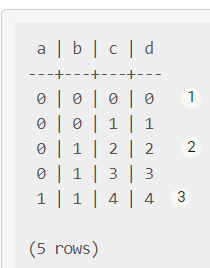

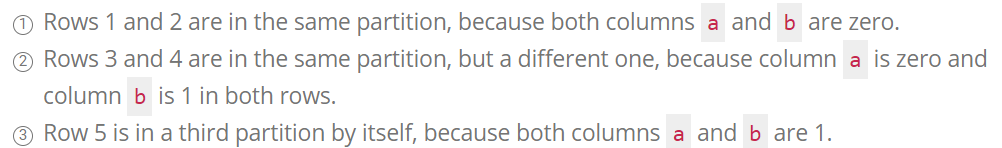

## Clustering columns
- The clustering columns of a table define the clustering order for the partition of that table. 
- For a given partition, all rows are ordered by that clustering order
- Clustering columns also add uniqueness to a row in a table.

In [17]:
CREATE TABLE t2 (
    a int,
    b int,
    c int,
    d int,
    PRIMARY KEY (a, b, c)
);
INSERT INTO t2 (a, b, c, d) VALUES (0,0,0,0);
INSERT INTO t2 (a, b, c, d) VALUES (0,0,1,1);
INSERT INTO t2 (a, b, c, d) VALUES (0,1,2,2);
INSERT INTO t2 (a, b, c, d) VALUES (0,1,3,3);
INSERT INTO t2 (a, b, c, d) VALUES (1,1,4,4);
SELECT * FROM t2;

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

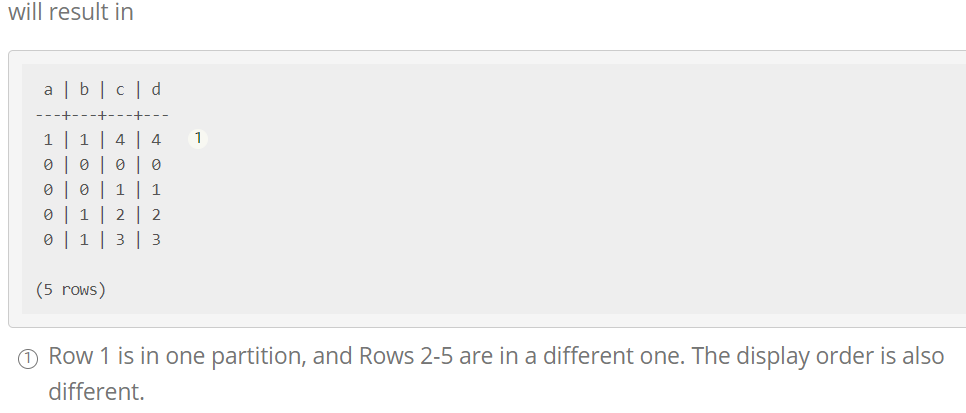

- Looking more closely at the four rows in the same partition, the b clustering column defines the order in which those rows are displayed. Whereas the partition key of the table groups rows on the same node, the clustering columns control how those rows are stored on the node.
- That sorting allows the very efficient retrieval of a range of rows within a partition

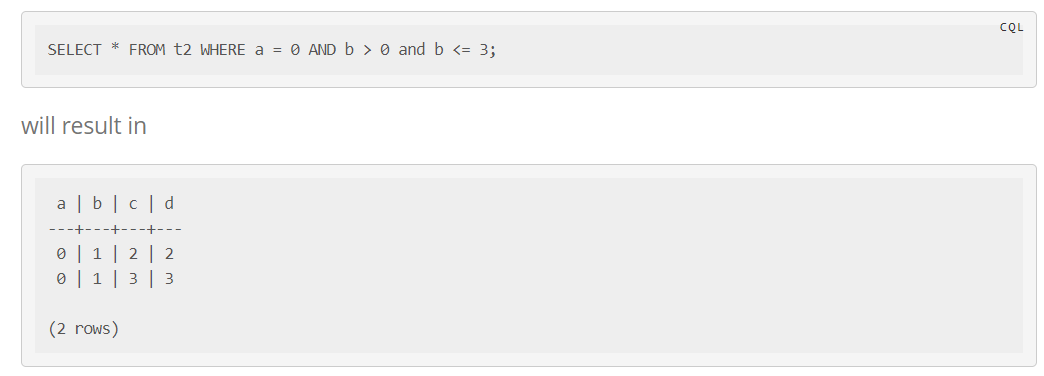